# Analysing numpy.random package


This notebook contains information about numpy.random package, which is a part of the numoy package for Python. 

The main purpose of this sub-package is to generate random numbers, which are very useful for many practical applications in mathematics.

This investigation will attempt to analyse the different approaches to this random number genartion processes which are included in numpy.random


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Simple random data

Under this denomination there are different functions, as listed below:
- rand(d0, d1, …, dn)
- randn(d0, d1, …, dn)
- randint(low[, high, size, dtype])
- random_integers(low[, high, size]) 
- random_sample([size])
- random([size])
- ranf([size])
- sample([size])
- choice(a[, size, replace, p])
- bytes(length): 



### Rand Function
As described on the documentation, rand function "create(s) an array of the given shape and populate it with random samples from a uniform distribution over 0 and 1".

Using DataFrames we can easilly see how this values are distributed. In this case, over 5,000 random samples it clearly shows an even distribution, having the same possibilities of obtaining any value in the range.

Thus, quartiles are roughly correspondant with the values. First quartile represents approximately 25% of the cases. Second quartile is 50%, and so on.

Adding a second random variable to the plot, we can also observe this distribution. 

                 0
count  5000.000000
mean      0.497705
std       0.286824
min       0.000028
25%       0.246084
50%       0.498436
75%       0.740751
max       0.999902


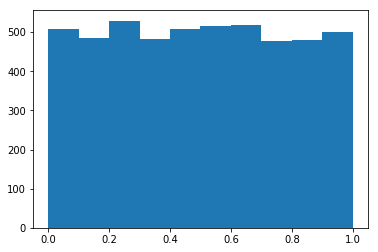

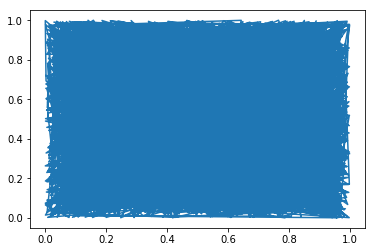

In [15]:
# Measures of central tendency with Panda Data Frames

x= np.random.rand(5000)
df = pd.DataFrame(x)
print (df.describe())

plt.hist(x)
plt.show()

# Plotting two random distributions (x,y)

y= np.random.rand(5000)

plt.plot(x,y)
plt.show()

## randn function
As the precedent, this function also provides an array with n random values, but within a range defined by a Gaussian distribution. Among normal or gaussian distributions are characterised for having mean=0 and Variance=1, as shown (roughly) in the below table:

In [16]:
x= np.random.randn(5000)
df = pd.DataFrame(x)
print (df.describe())

                 0
count  5000.000000
mean     -0.027642
std       1.007780
min      -3.911725
25%      -0.699924
50%      -0.034924
75%       0.639326
max       3.408772


## randint function
In this case, random values obtained are integers in the specified interval, with the possibility to choose the the desired dtype of the output.

## random_integers function
Similar to randint. In particular, this is the one to use to generate uniformly distributed discrete non-integers. 

/home/luis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(0, 9 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


(array([491., 492., 514., 518., 502., 499., 508., 495., 476., 505.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

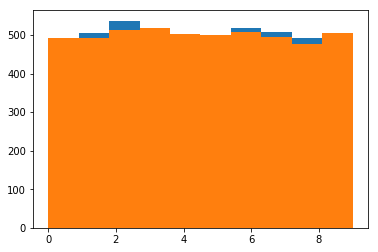

In [4]:
x=np.random.randint(0,10,size=5000)
plt.hist(x)
x=np.random.random_integers (0,9, size=5000)
plt.hist(x)

## sample, random_sample, random & ranf functions
These four are aliases for the same function, and can be used indiscriminately.

Returns an array of random float values between 0 and 1 (not inclusive) from the continuous uniform distribution, where all outcomes in a range between a minimum and maximum value are equally likely.

This distribution is used in statistics. A sample from this distribution (between zero and one) can be used to generate random samples from other distributions (by inversion of the cumulative form of the  distribution).

In [23]:
a= np.random.random_sample(10)
b= np.random.sample(10)
c= np.random.random(10)
d= np.random.ranf(10)
print (a, b, c, d)


[0.92702076 0.86804642 0.01396217 0.64455916 0.55038714 0.51428803
 0.95746345 0.55969865 0.28558102 0.18336655] [0.17988161 0.80848932 0.29406337 0.59830581 0.98035233 0.51053057
 0.50671833 0.98725969 0.57502587 0.08576467] [0.70319202 0.34287796 0.28862024 0.34476727 0.21855267 0.66547429
 0.94839266 0.75699259 0.20575444 0.80768439] [0.99302523 0.21625999 0.64841034 0.58395798 0.17594742 0.37728613
 0.21340665 0.61189549 0.2837987  0.28873999]


## choice function